# Model: Regression 

In diesem Notebook werden verschiedene Regressionsmodelle angewendet, um den mittleren Immobilienpreis von Distrikten in Kalifornien vorherzusagen. Dabei ist die Anforderung an die Modelle einen RMSE von kleiner 70 Tsd. USD zu erzielen. Dann wird das Projekt als Erfolg gewertet. 

Die Regressionsmodelle werden in diesem Notebook mit der Bibliothek Statsmodels und der Bibliothek scikit-learn durchgeführt. Grundlegend ist jedes Modell in *Data preperation*, *Build* und *Metrics und Validation* unterteilt. Das beste Modell der jeweiligen Bibliothek wird am Ende des Abschnitts mit den Testdaten validiert. 


> Über diesen [Link](https://sh333hdm.github.io/jupyterbooktest/intro.html) ist die Ansicht der Projektarbeit als Jupyter Book möglich. 

## Models statsmodels

In [256]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from func import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

%load_ext autoreload
%autoreload 2
sns.set_theme(palette="Pastel2", style="whitegrid") 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Statsmodels OLS

**Data preperation**

In [257]:
df = read_data()
df = transform_data(df)
train_dataset, test_dataset = split_data(df)
train_dataset = fill_missingdata(train_dataset)
train_dataset = add_feautures(train_dataset)
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash
14740,-117.05,32.58,22.0,2101,399.0,1551,371,4.1518,136900.0,NEAR OCEAN,below,0.239201,5.663073,5.265664,9mu
10101,-117.97,33.92,32.0,2620,398.0,1296,429,5.7796,241300.0,<1H OCEAN,above,0.331019,6.107226,6.582915,9qh
20566,-121.84,38.65,29.0,3167,548.0,1554,534,4.3487,200700.0,INLAND,above,0.343629,5.930712,5.779197,9qc
2670,-115.60,33.20,37.0,709,187.0,390,142,2.4511,72500.0,INLAND,below,0.364103,4.992958,3.791444,9mv
15709,-122.43,37.79,25.0,1637,394.0,649,379,5.0049,460000.0,NEAR BAY,above,0.583975,4.319261,4.154822,9q8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,-118.22,33.86,16.0,8732,1489.0,3944,1493,5.1948,203500.0,<1H OCEAN,above,0.378550,5.848627,5.864338,9q5
8767,-118.39,33.81,35.0,1008,165.0,391,167,3.7778,487500.0,NEAR OCEAN,above,0.427110,6.035928,6.109091,9q5
16388,-121.30,38.05,52.0,122,26.0,62,25,1.1500,112500.0,INLAND,below,0.403226,4.880000,4.692308,9qc
19949,-119.37,36.21,35.0,2228,476.0,1567,449,1.4455,54100.0,INLAND,below,0.286535,4.962138,4.680672,9q7


**Model 1 OLS: Build**

In [258]:
lm1 = smf.ols(formula ='median_house_value ~ median_income', data=train_dataset).fit()

Als erstes Modell wird eine einfache lineare Regression durchgeführt. Als unabhängige Variable wird *median_income* gewählt, da das mittlere Einkommen eines Bezirks die höchste Korrelation zu *median_house_value* aufweist. 

In [259]:
train_dataset['y_pred'] = lm1.predict()

**Model OLS 1: Metrics and Validation**

In [260]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:51:09   Log-Likelihood:            -2.1069e+05
No. Observations:               16511   AIC:                         4.214e+05
Df Residuals:                   16509   BIC:                         4.214e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.624e+04   1479.396     31.257      0.000    4.33e+04    4.91e+04
median_income   4.15e+04    342.835    121.056      0.000    4.08e+04    4.22e+04
==============================================================================
Omnibus:                     3462.094   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7756.529
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       5.347   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Die Kenngrößen sind wie erwartet nicht zielführend. Der Adj. R-squared liegt bei 0.47. Dieser besagt, dass unter 50% der Streuung der Werte durch das Modell korrekt vorhergesagt werden kann. Weitere Kenngrößen werden im Vergleich zum zweiten Modell betrachtet. 

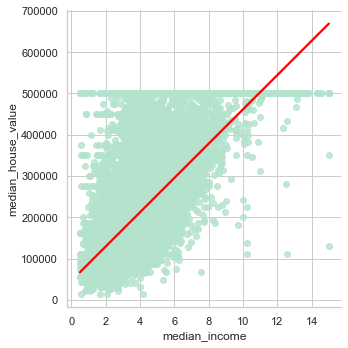

In [261]:
plt.rcParams['figure.figsize'] = [7, 7]
sns.lmplot(x='median_income', y='median_house_value', data=train_dataset, line_kws={'color':'red'}, height=5, ci=None);

In [262]:
r2_lm1, rmse_lm1, mse_lm1 = metrics_stats(lm1,train_dataset)

r2:  0.4702
RMSE  84238.28
MSE:  7096088082.25


Ebenfalls liegt der RMSE mit 84.238 USD über dem Zielwert von 70 Tsd. USD. Das Modell kann dementsprechend nicht als Erfolg gewertet werden. 

**Model 2 OLS: Build**

In [263]:
lm2 = smf.ols(formula ='median_house_value ~ median_income + total_rooms_total_bedrooms', data=train_dataset).fit()

In [264]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['y_pred'] = lm2.predict()

**Model 2 OLS: Metrics and Validation**

In [265]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     8435.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:51:10   Log-Likelihood:            -2.1012e+05
No. Observations:               16511   AIC:                         4.202e+05
Df Residuals:                   16508   BIC:                         4.203e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.257e+05   2723.597     46.138      0.000     1.2e+05    1.31e+05
median_income               5.328e+04    477.415    111.600      0.000    5.23e+04    5.42e+04
total_rooms_total_bedrooms -2.504e+04    730.782    -34.258      0.000   -2.65e+04   -2.36e+04
==============================================================================
Omnibus:                     3765.914   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11861.969
Skew:                           1.164   Prob(JB):                         0.00
Kurtosis:                       6.439   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


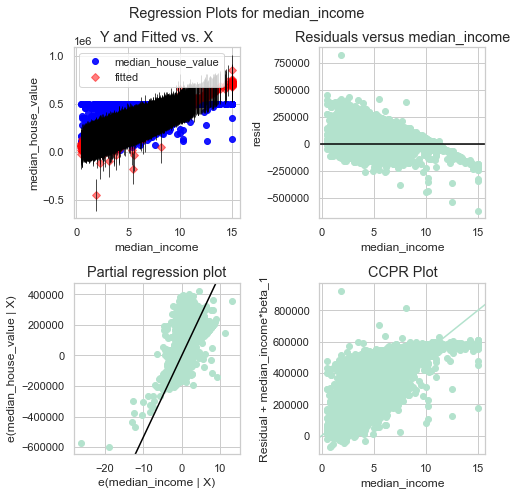

In [266]:
fig = sm.graphics.plot_regress_exog(lm2, "median_income")

eval_env: 1


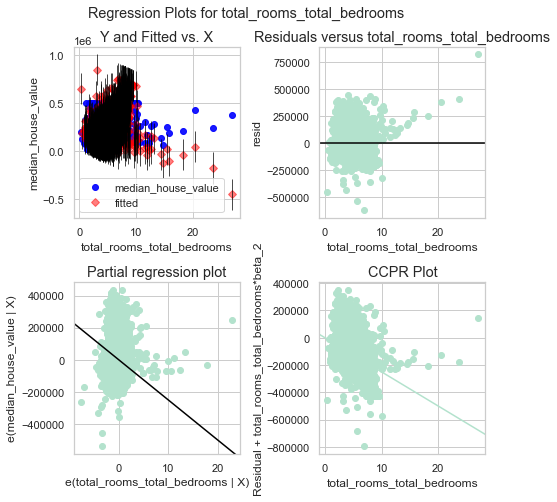

In [267]:
fig = sm.graphics.plot_regress_exog(lm2, "total_rooms_total_bedrooms")

Im Vergleich zu Model 1 erreicht das Model 2 besser statistische Kenngrößen. Der Adj. R-squared liegt bei ca. 3% über dem von Model 1. Sowohl die Kenngröße der F-Statistik, wie auch AIC und BIC sind höher als bei Model 1. 

> Hinweis: Zu diesem Modell wird eine ausführliche Regression Diagnostics durchgeführt. 

In [268]:
r2_lm2, rmse_lm2, mse_lm2 = metrics_stats(lm2,train_dataset)

r2:  0.5054
RMSE  81394.62
MSE:  6625084040.2


Der RMSE liegt mit ca. 81,4 Tsd. USD immer noch deutlich über 70 Tsd. USD. Es muss dementsprechend ein geeigneteres Modell gefunden werden. 

**Model 3 OLS: Build**

In [269]:
lm3 = smf.ols(formula ='median_house_value ~ median_income + C(ocean_proximity) + households_population + total_rooms_households +C(geohash) + housing_median_age', data=train_dataset).fit()

Im dritten Modell werden mehr Variablen aus dem ursprünglichen Datensatz berücksichtigt. Nicht miteingeschlossen werden: 
 
* *longitude*, *latidue* (siehe Feauture Selection)
* *total_rooms*, *total__bedrooms*, *population* und *households*, da die Korrelation dieser Merkmale untereinander zu hoch ist (siehe Feauture Selection)
* *price_category*, da diese aus *median_house_value* abgeleitet wird
* *total_rooms_total_bedrooms*, da nach einmaliger Durchführung der Klassifikation ein p-Wert von P|z|=0.555 ermittelt wurde



In [270]:
train_dataset['y_pred'] = lm3.predict()

**Model OLS 3: Metrics and Validation**

In [271]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     970.5
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:51:15   Log-Likelihood:            -2.0608e+05
No. Observations:               16511   AIC:                         4.122e+05
Df Residuals:                   16471   BIC:                         4.125e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.021e+04   1.06e+04      1.913      0.056    -499.590    4.09e+04
C(ocean_proximity)[T.INLAND]     -4.854e+04   1801.660    -26.943      0.000   -5.21e+04    -4.5e+04
C(ocean_proximity)[T.ISLAND]      1.214e+05   3.35e+04      3.627      0.000    5.58e+04    1.87e+05
C(ocean_proximity)[T.NEAR BAY]   -1.555e+04   2222.785     -6.994      0.000   -1.99e+04   -1.12e+04
C(ocean_proximity)[T.NEAR OCEAN]  7499.9029   1777.907      4.218      0.000    4015.012     1.1e+04
C(geohash)[T.9mu]                -8.981e+04   1.01e+04     -8.867      0.000    -1.1e+05      -7e+04
C(geohash)[T.9mv]                -9.892e+04   1.15e+04     -8.622      0.000   -1.21e+05   -7.64e+04
C(geohash)[T.9my]                -1.015e+05   1.99e+04     -5.101      0.000    -1.4e+05   -6.25e+04
C(geohash)[T.9nz]                -4743.1943   6.46e+04     -0.073      0.941   -1.31e+05    1.22e+05
C(geohash)[T.9pp]                -1.722e+05   1.32e+04    -13.050      0.000   -1.98e+05   -1.46e+05
C(geohash)[T.9pr]                -1.634e+05   1.31e+04    -12.488      0.000   -1.89e+05   -1.38e+05
C(geohash)[T.9q3]                -3.657e+04   1.41e+04     -2.602      0.009   -6.41e+04   -9019.975
C(geohash)[T.9q4]                -4.804e+04   1.07e+04     -4.479      0.000   -6.91e+04    -2.7e+04
C(geohash)[T.9q5]                 -4.74e+04   1.01e+04     -4.671      0.000   -6.73e+04   -2.75e+04
C(geohash)[T.9q6]                -8.497e+04   1.11e+04     -7.644      0.000   -1.07e+05   -6.32e+04
C(geohash)[T.9q7]                -1.113e+05   1.07e+04    -10.429      0.000   -1.32e+05   -9.04e+04
C(geohash)[T.9q8]                 8403.5853   1.04e+04      0.808      0.419    -1.2e+04    2.88e+04
C(geohash)[T.9q9]                -5.983e+04   1.02e+04     -5.879      0.000   -7.98e+04   -3.99e+04
C(geohash)[T.9qb]                -8.567e+04   1.05e+04     -8.125      0.000   -1.06e+05    -6.5e+04
C(geohash)[T.9qc]                -1.013e+05   1.03e+04     -9.793      0.000   -1.22e+05    -8.1e+04
C(geohash)[T.9qd]                -1.062e+05   1.05e+04    -10.077      0.000   -1.27e+05   -8.56e+04
C(geohash)[T.9qe]                -9.941e+04   1.28e+04     -7.748      0.000   -1.25e+05   -7.43e+04
C(geohash)[T.9qf]                -9.811e+04   1.12e+04     -8.750      0.000    -1.2e+05   -7.61e+04
C(geohash)[T.9qg]                -1.126e+05   3.82e+04     -2.946      0.003   -1.88e+05   -3.77e+04
C(geohash)[T.9qh]                -7.808e+04   1.02e+04     -7.644      0.000   -9.81e+04   -5.81e+04
C(geohash)[T.9qj]                -1.083e+05   1.24e+04     -8.751      0.000   -1.33e+05    -8.4e+04
C(geohash)[T.9qk]                -1.581e+05   1.62e+04     -9.774      0.000    -1.9e+05   -1.26e+05
C(geohash)[T.9qm]                -1.303e+05   3.82e+0

In [272]:
r2_lm3, rmse_lm3, mse_lm3 = metrics_stats(lm3,train_dataset)

r2:  0.6968
RMSE  63731.02
MSE:  4061642561.4


Durch Model 3 konnte ein RMSE von 63.731 USD und damit unter der Grenze von 70 Tsd. USD erzielt werden. Erst nach Evaluation mit einem Testdatenset kann, dass Model als Erfolg gewertet werden. 

### Regression Diagnostics

**Outliner and High-Leverage**

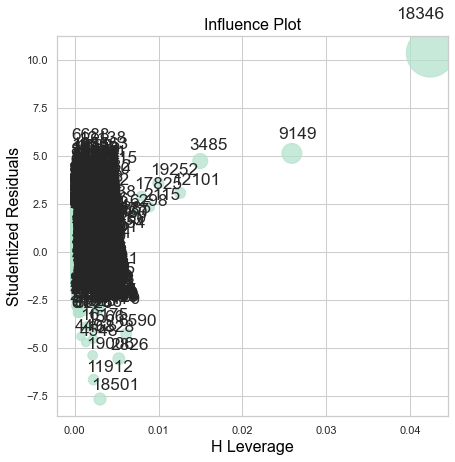

In [273]:
fig = sm.graphics.influence_plot(lm2, criterion="cooks")

In [274]:
lm_cooksd = lm2.get_influence().cooks_distance[0]
n = len(train_dataset["median_house_value"])
print('Anzahl an Datensätzen:', n)
critical_d = 4/n
print('Kritische Cook distance:', critical_d)
out_d = lm_cooksd > critical_d
print("Anzahl Datensätze mit kritischer Cooks distance:",len(lm_cooksd[out_d]))

Anzahl an Datensätzen: 16511
Kritische Cook distance: 0.00024226273393495245
Anzahl Datensätze mit kritischer Cooks distance: 1019


1019 Datensätzen besitzen eine kritische Cooks Distanz. Dabei handelt es sich um vermutliche *Outliner* mit *leverage*. Ein einfaches Vorgehen ist diese Distrikte zu entfernt. 

In [275]:
train_dataset.index[out_d]

Int64Index([15709, 15631,  4585, 10574, 17237,  4643,  5366,  4592,  5288,
            15700,
            ...
            18339, 14404, 12341,  4065, 15641, 20091,  4245,  5282, 16835,
             8767],
           dtype='int64', length=1019)

In [276]:
train_dataset_opt = train_dataset.drop(train_dataset.index[out_d])
train_dataset_opt

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash,y_pred
14740,-117.05,32.58,22.0,2101,399.0,1551,371,4.1518,136900.0,NEAR OCEAN,below,0.239201,5.663073,5.265664,9mu,180544.513708
10101,-117.97,33.92,32.0,2620,398.0,1296,429,5.7796,241300.0,<1H OCEAN,above,0.331019,6.107226,6.582915,9qh,278180.815364
20566,-121.84,38.65,29.0,3167,548.0,1554,534,4.3487,200700.0,INLAND,above,0.343629,5.930712,5.779197,9qc,156587.429451
2670,-115.60,33.20,37.0,709,187.0,390,142,2.4511,72500.0,INLAND,below,0.364103,4.992958,3.791444,9mv,98711.659404
439,-122.29,37.85,52.0,477,119.0,218,106,2.5682,120000.0,NEAR BAY,below,0.486239,4.500000,4.008403,9q9,219865.838358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,-118.38,34.15,36.0,2933,619.0,1115,579,4.3036,365900.0,<1H OCEAN,above,0.519283,5.065630,4.738288,9q5,315029.218008
7616,-118.22,33.86,16.0,8732,1489.0,3944,1493,5.1948,203500.0,<1H OCEAN,above,0.378550,5.848627,5.864338,9q5,294980.478761
16388,-121.30,38.05,52.0,122,26.0,62,25,1.1500,112500.0,INLAND,below,0.403226,4.880000,4.692308,9qc,67794.945044
19949,-119.37,36.21,35.0,2228,476.0,1567,449,1.4455,54100.0,INLAND,below,0.286535,4.962138,4.680672,9q7,24155.335531


**Non-linearity and heteroscedasticity**

eval_env: 1
eval_env: 1
eval_env: 1


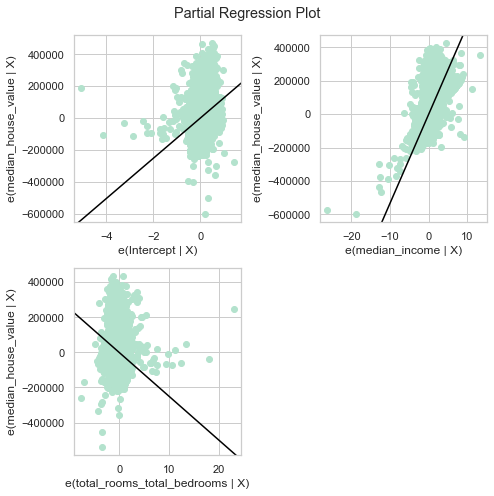

In [277]:
fig = sm.graphics.plot_partregress_grid(lm2)
fig.tight_layout(pad=1.0)

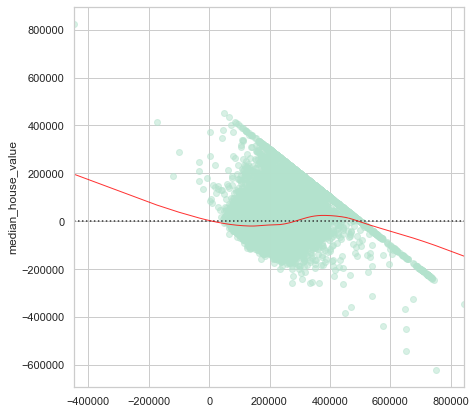

In [278]:
model_fitted_y = lm2.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='median_house_value', data=train_dataset, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

* Es liegt keine ungleichmäßige Verteilung der residuals vor: Hinweis auf Heteroscedasticity
* Vermutlich liegt auch keine lineare Beziehung vor, da die rote Linie sich von der Gestrichelten unterscheidet.

In [279]:
# Breusch-Pagan Lagrange Multiplier test

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(lm2.resid, lm3.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1911.1282277715711),
 ('p-value', 0.0),
 ('f-value', 55.283578339195074),
 ('f p-value', 0.0)]

Beide p-werte liegen deutlich unter 0.05. Daher wird die Null-Hypothese abgelehnt. 
Dieses Ergebnis ist ebenfalls ein Indikator für Heteroscedasticity. Eine mögliche Lösung ist in diesem Fall die Anwendung eines Regression Splines. Dies wird in einem der folgenenden Abschnitten untersucht. 

**Non-normally distributed errors**

In [280]:
#Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.jarque_bera(lm2.resid)

lzip(name, test)

[('Jarque-Bera', 11861.969271208563),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 1.1637299076876573),
 ('Kurtosis', 6.438780225717456)]

Der p-Wert liegt bei 0.0 damit wird die Nullhyptothese abgelehnt. Das ist ein Indikator für nicht normalverteilte *error terms*.

In [281]:
#Omnibus normtest
name = ['Chi^2', 'Two-tail probability']
test = sm.stats.omni_normtest(lm2.resid)
lzip(name, test)

[('Chi^2', 3765.9137109308194), ('Two-tail probability', 0.0)]

Auch bei diesem Test wird die Nullhyptothese abgelehnt. Dies lässt ebenso auf nicht normalverteilte *error terms* schließen. 

Da die Anzahl an Datensätzen sehr hoch ist, müssen die Fehler nicht normalverteilt sein. Grund dafür ist der zentrale Grenzwertsatz. Es werden keine weiteren Schritte unternommen. 

**Correlation of error terms**

In [282]:

sm.stats.durbin_watson(lm2.resid)

1.985747491177888

Der Wert liegt zwischen 1 und 2, aber sehr nah an der 2. Im ersten Schritt wird keine Korrelation der *error terms* angenommen.  

**Collinearity**

In [283]:
#Variance inflation factor
y, X = dmatrices('median_house_value ~ median_income + total_rooms_total_bedrooms', data=train_dataset, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,18.48,Intercept
1,2.08,median_income
2,2.08,total_rooms_total_bedrooms


Für dieses Modell liegt keine problematische Kollinearität in den Daten vor. 

**Model OLS 3 opt: Build**


In diesem linearen Modell wird das Modell mit multipler linearer Regression auf die bereinigten Trainingsdaten nach der Regression Diagnostics angewendet. 


In [284]:
lm3opt = smf.ols(formula ='median_house_value ~ median_income + C(ocean_proximity) + households_population + total_rooms_households +C(geohash) + housing_median_age', data=train_dataset_opt).fit()

In [285]:
train_dataset_opt['y_pred'] = lm3opt.predict()

**Model OLS 3 opt: Metrics and Validation**

In [286]:
lm3opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1212.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:53:05   Log-Likelihood:            -1.8954e+05
No. Observations:               15492   AIC:                         3.792e+05
Df Residuals:                   15452   BIC:                         3.795e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.657e+04   8927.873      2.976      0.003    9067.712    4.41e+04
C(ocean_proximity)[T.INLAND]     -4.381e+04   1438.307    -30.458      0.000   -4.66e+04    -4.1e+04
C(ocean_proximity)[T.ISLAND]      2.753e+04   5.06e+04      0.544      0.586   -7.17e+04    1.27e+05
C(ocean_proximity)[T.NEAR BAY]   -1.515e+04   1791.166     -8.456      0.000   -1.87e+04   -1.16e+04
C(ocean_proximity)[T.NEAR OCEAN]  1.155e+04   1458.700      7.916      0.000    8687.116    1.44e+04
C(geohash)[T.9mu]                -8.245e+04   8557.908     -9.634      0.000   -9.92e+04   -6.57e+04
C(geohash)[T.9mv]                -8.148e+04   9570.227     -8.514      0.000      -1e+05   -6.27e+04
C(geohash)[T.9my]                -9.325e+04   1.73e+04     -5.377      0.000   -1.27e+05   -5.93e+04
C(geohash)[T.9nz]                 2.172e+04   5.06e+04      0.429      0.668   -7.75e+04    1.21e+05
C(geohash)[T.9pp]                -1.481e+05   1.08e+04    -13.650      0.000   -1.69e+05   -1.27e+05
C(geohash)[T.9pr]                -1.416e+05   1.07e+04    -13.207      0.000   -1.63e+05   -1.21e+05
C(geohash)[T.9q3]                 -4.35e+04    1.2e+04     -3.635      0.000    -6.7e+04      -2e+04
C(geohash)[T.9q4]                -4.487e+04   9027.657     -4.971      0.000   -6.26e+04   -2.72e+04
C(geohash)[T.9q5]                -4.229e+04   8572.389     -4.934      0.000   -5.91e+04   -2.55e+04
C(geohash)[T.9q6]                -7.378e+04   9291.964     -7.940      0.000    -9.2e+04   -5.56e+04
C(geohash)[T.9q7]                -9.472e+04   8957.942    -10.574      0.000   -1.12e+05   -7.72e+04
C(geohash)[T.9q8]                 3927.7120   8793.857      0.447      0.655   -1.33e+04    2.12e+04
C(geohash)[T.9q9]                -4.772e+04   8595.585     -5.552      0.000   -6.46e+04   -3.09e+04
C(geohash)[T.9qb]                -6.528e+04   8865.548     -7.363      0.000   -8.27e+04   -4.79e+04
C(geohash)[T.9qc]                -8.454e+04   8714.604     -9.701      0.000   -1.02e+05   -6.75e+04
C(geohash)[T.9qd]                -9.002e+04   8868.124    -10.151      0.000   -1.07e+05   -7.26e+04
C(geohash)[T.9qe]                -7.646e+04   1.07e+04     -7.174      0.000   -9.74e+04   -5.56e+04
C(geohash)[T.9qf]                -7.422e+04   9371.415     -7.920      0.000   -9.26e+04   -5.58e+04
C(geohash)[T.9qg]                -8.893e+04   3.01e+04     -2.958      0.003   -1.48e+05      -3e+04
C(geohash)[T.9qh]                -6.666e+04   8620.116     -7.733      0.000   -8.36e+04   -4.98e+04
C(geohash)[T.9qj]                -8.917e+04   1.03e+04     -8.673      0.000   -1.09e+05    -6.9e+04
C(geohash)[T.9qk]                -1.472e+05   1.41e+04    -10.434      0.000   -1.75e+05    -1.2e+05
C(geohash)[T.9qm]                -1.177e+05   3.01e+0

In [287]:
r2_lm3opt, rmse_lm3opt, mse_lm3opt = metrics_stats(lm3opt,train_dataset_opt)

r2:  0.7536
RMSE  49803.87
MSE:  2480425056.56


Für dieses Modell liegt der RMSE unter 50 Tsd. USD.  Wird nur diese Größe betrachtet handelt es hierbei um das beste Modell. 

### Statsmodel Lasso

**Model Lasso: Build**

Mit dem Parameter `L1_wt` wird eine regularisiertes Modell nach Lasso umgesetzt. Zu dieser Umsetzung sind wenige Quellen verfügbar.  

In [288]:
lmlasso = smf.ols(formula ='median_house_value ~ median_income + C(ocean_proximity) + households_population + total_rooms_households + total_rooms_total_bedrooms+C(geohash)', data=train_dataset).fit_regularized(L1_wt=1)

In [289]:
train_dataset['y_pred'] = lmlasso.predict()

**Model Lasso: Metrics and Validation**

In [290]:
rmse_lasso= round(rmse(train_dataset['median_house_value'], train_dataset['y_pred']), 2)
mse_lasso = round (mse(train_dataset['median_house_value'], train_dataset['y_pred']), 2)
print("RMSE ",rmse_lasso)
print("MSE: ",mse_lasso)


RMSE  66740.06
MSE:  4454235922.2


Der RMSE liegt mit ca. 66,7 Tsd. USD unter 70 Tsd. USD. 

### Natural Spline Statsmodel

**Model Splines: Build**

Das Natural Splines Modell wird mit nur einer Variablen umgesetzt. Da *median_income* die höchste Korrelation  mit *median_house_value* aufweist wird dieser in das Modell einbezogen. 

In [291]:
X_train = train_dataset['median_income']
y_train = train_dataset['median_house_value']

In [292]:
from patsy import dmatrix
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')

In [293]:
spline = sm.GLM(y_train, transformed_x3).fit()

In [294]:
y_pred= spline.predict(dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe'))

**Model Splines: Metrics and Validation**

In [295]:
spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     median_house_value   No. Observations:                16511
Model:                            GLM   Df Residuals:                    16508
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      7.0501e+09
Method:                          IRLS   Log-Likelihood:            -2.1063e+05
Date:                Wed, 19 Jan 2022   Deviance:                   1.1638e+14
Time:                        19:53:09   Pearson chi2:                 1.16e+14
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5935
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.137e+05   2081.252    102.694      0.000     2.1e+05    2.18e+05
cr(train, df=3)[0] -1.637e+05   1833.977    -89.247      0.000   -1.67e+05    -1.6e+05
cr(train, df=3)[1] -1.035e+04   2352.411     -4.401      0.000    -1.5e+04   -5742.739
cr(train, df=3)[2]  3.878e+05   5468.656     70.907      0.000    3.77e+05    3.98e+05
======================================================================================
"""

In [296]:
rmse_spline= round(rmse(train_dataset['median_house_value'], y_pred), 2)
mse_spline = round (mse(train_dataset['median_house_value'], y_pred), 2)
print("RMSE ",rmse_spline)
print("MSE: ",mse_spline)

RMSE  83955.93
MSE:  7048597740.17


Der RMSE liegt bei über 70 Tsd. USD. Grund für diese Ergebnis ist die Beschränkung auf nur eine Variable.  

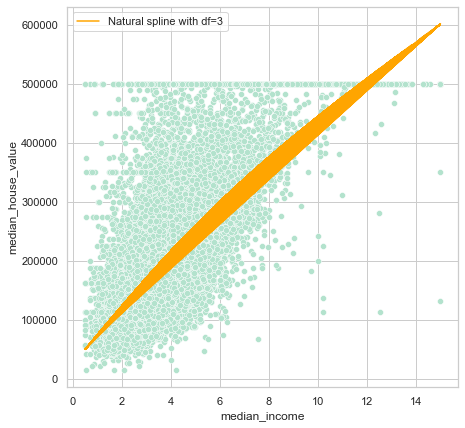

In [297]:
sns.scatterplot(x=X_train, y=y_train)
plt.plot(X_train, y_pred, color='orange', label='Natural spline with df=3')
plt.legend()

### Evaluation

Für die Evaluation werden die RMSE der einzelnen Modelle miteinander verglichen. Das Modell mit dem niedrigsten RMSE wird mit den Testdaten validiert. 

In [298]:
results= {'RMSE': ['RMSE OLS 1', 'RMSE OLS 2', 'RMSE OLS 3', 'RMSE OLS 3 opt', 'RMSE Lasso', 'RMSE Spline'],
        'Werte': [rmse_lm1, rmse_lm2, rmse_lm3, rmse_lm3opt, rmse_lasso, rmse_spline] }
df_results = pd.DataFrame(results)
df_results.sort_values(by ='Werte')

,RMSE,Werte
3,RMSE OLS 3 opt,49803.87
2,RMSE OLS 3,63731.02
4,RMSE Lasso,66740.06
1,RMSE OLS 2,81394.62
5,RMSE Spline,83955.93
0,RMSE OLS 1,84238.28


In [299]:
test_dataset = add_feautures(test_dataset)
test_dataset = fill_missingdata(test_dataset)

In [300]:
test_dataset['y_pred'] = lm3opt.predict(test_dataset[['median_income', 'ocean_proximity', 'households_population', 'total_rooms_households', 'housing_median_age', 'geohash']])

In [301]:
r2_test, rmse_test, mse_test = metrics_stats(lm3opt,test_dataset)

r2:  0.7536
RMSE  63071.78
MSE:  3978049594.35


Das Modell kann als Erfolg gewertet werde, das Modell angewandt auf die Testdaten ebenfalls ein RMSE von unter 70 Tsd. USD erreicht.  

## Model sklearn

In [302]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns  


from func import *
from sklearn import set_config

%load_ext autoreload
%autoreload 2
set_config(display="diagram")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### sklearn OLS

**Data Preperation**

Zur Datenvorbereitung  mit der Bibliothek scikit-learn wird ein *preprocessor* angewendet. Der Aufbau des *preprocessors* ist im Notebook Data genauer beschrieben. In diesem Fall wird dieser über die Funktion erstellt. 

In [303]:
df = read_data()
df = transform_data(df)

In [304]:
#Split Test and Trainingsdata
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [305]:
X_train = add_feautures(X_train)

In [306]:
#Feauture Selection 
X_train = X_train[['median_income', 'ocean_proximity','housing_median_age', 'households_population', 'total_rooms_households', 'total_rooms_total_bedrooms', 'geohash']]
X_train

,median_income,ocean_proximity,housing_median_age,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash
14196,3.2596,NEAR OCEAN,33.0,0.270870,5.017657,4.985646,9mu
8267,3.8125,NEAR OCEAN,49.0,0.575342,4.473545,4.297332,9q5
17445,4.1563,NEAR OCEAN,4.0,0.367213,5.645833,5.731118,9q4
14265,1.9425,NEAR OCEAN,36.0,0.250353,4.002817,3.871935,9mu
2271,3.5542,INLAND,43.0,0.434783,6.268421,5.526682,9qd
...,...,...,...,...,...,...,...
11284,6.3700,<1H OCEAN,35.0,0.329787,6.129032,6.616915,9qh
11964,3.0500,INLAND,33.0,0.256132,6.868597,5.410526,9qh
5390,2.9344,<1H OCEAN,36.0,0.300114,3.986717,3.692443,9q5
860,5.7192,<1H OCEAN,15.0,0.314575,6.395349,5.988275,9q9


In [307]:
preprocessor = build_preprocessor()

**Model OLS**

Das erste Modell, welches mit scikit-learn umsgesetzt wird, basiert ebenfalls auf der *Ordinary least squares*-Methode. Im Unterschied zu Statsmodel wird mit scikit-learn gleich eine Multiple-Regression durchgeführt, da diese deutlich bessere Ergebnisse erzielen konnte. 

In [308]:
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [309]:
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDF7703C8>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDF770408>)])),
                ('lm', LinearRegression())])

In [310]:
y_pred = lm_pipe.predict(X_train)

**Metrics and Validation**

In [311]:
r2_lm, rmse_lm, mse_lm = metrics_sk(y_train, y_pred)

r2:  0.7008
RMSE  63242.32
MSE:  3999591280.22


Durch die Wahl geeignter Variablen wird gleich zu Beginn ein Model mit einem RMSE unter 70 Tsd. USD erzielt. 

### sklearn Lasso

**Data preperation**

In [312]:
df = read_data()
df = transform_data(df)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,-122.23,37.88,NaN,880,129.0,322,126,8.3252,NaN,NEAR BAY,below
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY,above
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100.0,NEAR BAY,above
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300.0,NEAR BAY,above
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200.0,NEAR BAY,above
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845,330,1.5603,78100.0,INLAND,below
20636,-121.21,39.49,18.0,697,150.0,356,114,2.5568,77100.0,INLAND,below
20637,-121.22,39.43,17.0,2254,485.0,1007,433,1.7000,92300.0,INLAND,below
20638,-121.32,39.43,18.0,1860,409.0,741,349,1.8672,84700.0,INLAND,below


In [313]:
#Split Test and Trainingsdata
X = df.drop(columns = ['median_house_value', 'price_category'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [314]:
X_train = add_feautures(X_train)

In [315]:
preprocessor = build_preprocessor()

Bei der Vorbereitung der Daten für das Lasso-Modell werden keine weiteren Variablen ausgeschlossen, da dieses Model eine Feauture Selection durchführt. 

**Model LassoCV: Build**

Zur Bestimmung des optimalen Hyperparameters wird hier eine Lasso k-folds Cross Validation angewendet. Dafür werden die Trainingsdaten in fünf Teilsets aufgeteilt. 

In [316]:
LassoCV_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('LassoCV', LassoCV(cv=5, random_state=0, max_iter=10000))
                        ])

In [317]:
LassoCV_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDF75E588>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDF75E5C8>)])),
                ('LassoCV', LassoCV(cv=5, max_iter=10000, random_state=0))])

In [318]:
y_pred = LassoCV_pipe.predict(X_train)

**Model LassoCV: Metrics and Validation**

In [319]:
r2_lasso, rmse_lasso, mse_lasso = metrics_sk(y_train, y_pred)

r2:  0.7046
RMSE  62842.13
MSE:  3949133062.48


In [320]:
alpha = LassoCV_pipe.named_steps['LassoCV'].alpha_
alpha

79.85195644260375

Durch Auslesen des Attributs `alpha_` wird der am besten geeignte Hyperparameter ausgewählt. Dieser wird im folgenden auf die Lasso-Regression angewendet. 

**Model Lasso Best Alpha: Build**

In [321]:
Lasso_alpha_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Lasso', Lasso(alpha=alpha))
                        ])

In [322]:
Lasso_alpha_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDF75E588>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDF75E5C8>)])),
                ('Lasso', Lasso(alpha=79.85195644260375))])

**Model Lasso Best Alpha: Metrics and Validation**

In [323]:
r2_lasso, rmse_lasso, mse_lasso = metrics_sk(y_train, y_pred)

r2:  0.7046
RMSE  62842.13
MSE:  3949133062.48


In [324]:
importance = np.abs(Lasso_alpha_pipe.named_steps['Lasso'].coef_)
len(importance)

47

<AxesSubplot:>

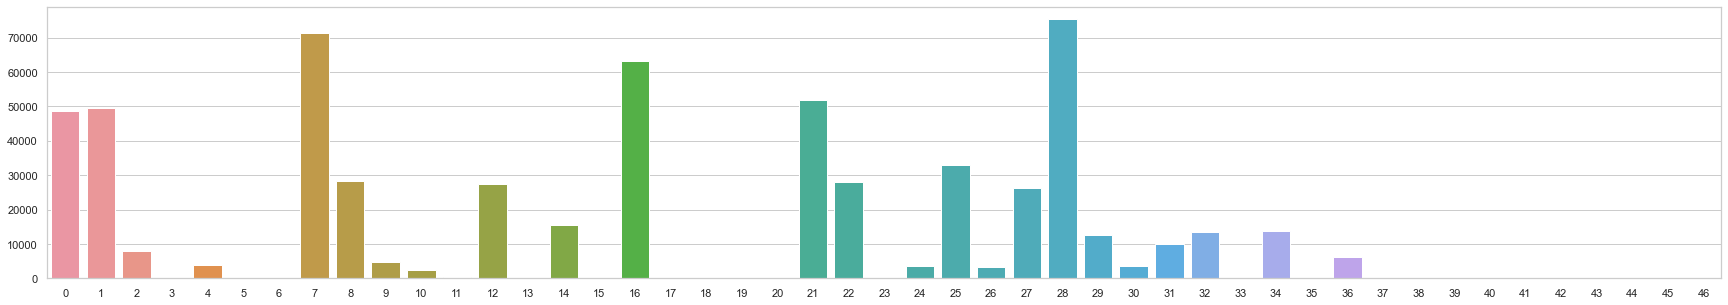

In [325]:
plt.rcParams['figure.figsize'] = [30, 5]
list = []
for i in range(len(importance)):
    list.append(i)
list

sns.barplot(x=list, y=importance)

Der RMSE liegt unter 70 Tsd. USD und entspricht demententsprechend den Anforderung an das Modell. 

### sklearn Spline

**Data preperation**

In [326]:
df = read_data()
df = transform_data(df)

In [327]:
#Split Test and Trainingsdata
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
X_train = add_feautures(X_train)

In [329]:
#Feauture Selection 
X_train = X_train[['median_income', 'ocean_proximity','housing_median_age', 'households_population', 'total_rooms_households', 'total_rooms_total_bedrooms', 'geohash']]

Im Gegensatz zu Statsmodels können bei scikit-lern mehr als eine Variable verwendet werden. 

In [330]:
preprocessor = build_preprocessor()

**Splines: Build**

In [331]:
Splines_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomialfeatures', PolynomialFeatures()),
    ('ridge', Ridge())
                        ])

In [332]:
Splines_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDECBE248>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EDECBE288>)])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [333]:
y_pred = Splines_pipe.predict(X_train)

**Splines: Metrics and Validation**

In [334]:
r2_spline, rmse_spline, mse_spline = metrics_sk(y_train, y_pred)

r2:  0.7628
RMSE  56311.61
MSE:  3170997160.3


Der RMSE liegt mit 56,3 Tsd. USD deutlich unter 70 Tsd. USD.

### Evaluation Sklearn

**Select best model**

Wie bei Statsmodel werden die RMSE-Werte zuerst verglichen und dann das beste Modell mit den Testdaten validiert. 

In [335]:
results= {'RMSE': ['RMSE OLS', 'RMSE Lasso', 'RMSE Spline'],
        'Werte': [rmse_lm, rmse_lasso, rmse_spline] }
df_results = pd.DataFrame(results)
df_results.sort_values(by ='Werte')

,RMSE,Werte
2,RMSE Spline,56311.61
1,RMSE Lasso,62842.13
0,RMSE OLS,63242.32


Das beste Modell ist das Spline-Modell. 

**Predict with test data**

In [336]:
X_test = add_feautures(X_test)
X_test = X_test[['median_income', 'ocean_proximity','housing_median_age', 'households_population', 'total_rooms_households', 'total_rooms_total_bedrooms', 'geohash']]

In [337]:
y_test_pred = Splines_pipe.predict(X_test)

**Final Results**

In [338]:
y_test.fillna(y_test.median(), inplace= True)
r2_test, rmse_test, mse_test = metrics_sk(y_test, y_test_pred)


r2:  0.7366
RMSE  58720.25
MSE:  3448068054.55


Der RMSE der Testdaten liegt ebenfalls unter 70 Tsd. USD bei 58,7 Tsd. USD. Dieses Ergebnis ist besser als das durch Statsmodel erzielte.

> Im Rahmen der Anforderungen kann auch die Regression als Erfolg gewertet werden.